# Spearman Heatmap
- Spearman Correlation
- Heatmap Visualization

> **Note:**  
> Use the DATASET TEMPLATES below to run the codes


In [44]:
# DATA_FILE = "raw_data/PSEN1_Sun.csv"
# OUTCOME_COLUMNS = ["AAO", "Total Activity", "Amount of Ab42", "Amount of Ab40", "Ab42/Ab40 ratio"]
# HEATMAP_TITLE = "Spearman's Correlation Heatmap — PSEN1 Sun et al."
# OUTPUT_PREFIX = "PSEN1_Sun"

In [45]:
# DATA_FILE = "raw_data/PSEN1_Petit.csv"
# OUTCOME_COLUMNS = ["Aβ37 [%]", "Aβ38 [%]", "Aβ40 [%]", "Aβ42 [%]", "Aβ43 [%]"]
# HEATMAP_TITLE = "Spearman's Correlation Heatmap — PSEN1 Petit et al."
# OUTPUT_PREFIX = "PSEN1_Petit"

In [46]:
# DATA_FILE = "raw_data/PSEN1_Pillai.csv"
# OUTCOME_COLUMNS = ["Aβ40 (relative to WT)", "Aβ42 (relative to WT)", "Aβ42/40"]
# HEATMAP_TITLE = "Spearman's Correlation Heatmap — PSEN1 Pillai et al."
# OUTPUT_PREFIX = "PSEN1_Pillai"

In [47]:
# DATA_FILE = "raw_data/PSEN2_Pillai.csv"
# OUTCOME_COLUMNS = ["Aβ40 (relative to WT)", "Aβ42 (relative to WT)", "Aβ42/40"]
# HEATMAP_TITLE = "Spearman's Correlation Heatmap — PSEN2 Pillai et al."
# OUTPUT_PREFIX = "PSEN2_Pillai"

In [48]:
# DATA_FILE = "raw_data/APP_Pillai.csv"
# OUTCOME_COLUMNS = ["Aβ40 (relative to WT)", "Aβ42 (relative to WT)", "Aβ42/40"]
# HEATMAP_TITLE = "Spearman's Correlation Heatmap — APP Pillai et al."
# OUTPUT_PREFIX = "APP_Pillai"

In [49]:
# --- 1️⃣ Import Libraries ---
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

### Change the cell below to read the dataset you want

In [50]:
# --- 2️⃣ User Inputs (EDIT THESE ONLY) ---
DATA_FILE = "../raw_data/PSEN2_Pillai.csv"
OUTCOME_COLUMNS = ["Aβ40 (relative to WT)", "Aβ42 (relative to WT)", "Aβ42/40"]
HEATMAP_TITLE = "Spearman's Correlation Heatmap — PSEN2 Pillai et al."
OUTPUT_PREFIX = "PSEN2_Pillai"

In [51]:
# --- 3️⃣ Load Dataset ---
df = pd.read_csv(DATA_FILE)
df  # display dataframe

,Variants,Mutation,Aβ40 (relative to WT),Significant?,Aβ42 (relative to WT),Significant?.1,Aβ42/40,Significant?.2,variant_id_hg38,variant_id_hg19,...,DANN_rankscore,fathmm-XF_coding_score,fathmm-XF_coding_rankscore,fathmm-XF_coding_pred,Eigen-raw_coding,Eigen-raw_coding_rankscore,Eigen-phred_coding,Eigen-PC-raw_coding,Eigen-PC-raw_coding_rankscore,Eigen-PC-phred_coding
0,PSEN2:p.Gly34Ser,G34S,0.88220,No,0.889000,No,1.004457,No,1-226882007-G-A,1-227069708-G-A,...,0.75658,0.571802,0.57414,D,-0.189727,0.33287,1.905424,-0.018588,0.38583,2.296761
1,PSEN2:p.Arg62Cys,R62C,0.88600,No,0.781400,No,0.880500,No,1-226883747-C-T,1-227071448-C-T,...,0.95255,0.117460,0.22797,N,-0.167589,0.34216,1.969186,-0.175230,0.32141,1.846288
2,PSEN2:p.Arg62His,R62H,0.89550,No,0.914240,No,1.019830,No,1-226883748-G-A,1-227071449-G-A,...,0.80366,0.080124,0.16002,N,-1.108583,0.06413,0.298882,-1.090905,0.07750,0.385016
3,PSEN2:p.Pro69Ala,P69A,0.95876,No,1.006211,No,1.051530,No,1-226883768-C-G,1-227071469-C-G,...,0.36789,0.155109,0.27811,N,-0.671303,0.16638,0.861662,-0.604769,0.19073,1.038948
4,PSEN2:p.Arg71Trp,R71W,0.84150,No,0.852100,No,1.008884,No,1-226883774-C-T,1-227071475-C-T,...,0.96597,0.567632,0.57163,D,-0.316521,0.28245,1.573784,-0.210682,0.30838,1.760295
5,PSEN2:p.Lys82Arg,K82R,0.88400,No,0.758200,No,0.855900,No,1-226883808-A-G,1-227071509-A-G,...,0.93473,0.933438,0.92507,D,0.465591,0.64912,4.779310,0.473126,0.66031,4.923123
6,PSEN2:p.Ala85Val,A85V,1.02974,No,0.966210,No,0.934430,No,1-226883817-C-T,1-227071518-C-T,...,0.99699,0.946459,0.95578,D,0.776371,0.84527,8.335622,0.693653,0.81798,7.635209
7,PSEN2:p.Pro123Leu,P123L,0.66060,Yes,1.371000,Yes,2.075000,Yes,1-226885549-C-T,1-227073250-C-T,...,0.95171,0.930268,0.91701,D,0.449499,0.63989,4.666192,0.452657,0.64699,4.754672
8,PSEN2:p.Val139Met,V139M,0.83280,No,0.791100,No,0.947890,No,1-226885596-G-A,1-227073297-G-A,...,0.81399,0.621109,0.60451,D,-0.000279,0.41582,2.510122,0.031252,0.40887,2.469312
9,PSEN2:p.Asn141Ile,N141I,0.20280,Yes,2.974000,Yes,14.610000,Yes,1-226885603-A-T,1-227073304-A-T,...,0.55730,0.948089,0.95920,D,0.691803,0.78981,7.006015,0.632767,0.77210,6.659115


In [52]:
# --- 4️⃣ Helper Functions ---
def coerce_numeric(s: pd.Series) -> pd.Series:
    """Convert a Series to numeric, removing symbols like '%' and ','."""
    if s.dtype.kind in "biufc":
        return s.astype(float)
    cleaned = (
        s.astype(str)
         .str.replace(r'[%\s]', '', regex=True)
         .str.replace(',', '', regex=False)
         .replace({'nan': np.nan, 'None': np.nan})
    )
    return pd.to_numeric(cleaned, errors="coerce")

def pairwise_corr(x, y, method="spearman"):
    """Compute correlation safely; require n ≥ 3."""
    x_num, y_num = coerce_numeric(x), coerce_numeric(y)
    mask = np.isfinite(x_num.values) & np.isfinite(y_num.values)
    n = int(mask.sum())
    if n < 3:
        return np.nan, np.nan, n
    if method == "spearman":
        r, p = stats.spearmanr(x_num[mask], y_num[mask])
    else:
        r, p = stats.pearsonr(x_num[mask], y_num[mask])
    return float(r), float(p), n

In [53]:
# --- 5️⃣ Identify Predictors/Outcomes ---
predictors = [c for c in df.columns if c.endswith("_rankscore")]
outcomes = [c for c in OUTCOME_COLUMNS if c in df.columns]

if not predictors:
    raise ValueError("No predictor columns ending with '_rankscore' found.")
if not outcomes:
    raise ValueError("None of the specified outcome columns were found in the dataset.")

print(f"Using {len(predictors)} predictors and {len(outcomes)} outcomes.\n")

Using 37 predictors and 3 outcomes.



In [54]:
# --- 6️⃣ Compute Correlations ---
rows = []
for pred in predictors:
    for out in outcomes:
        rho, pval, n = pairwise_corr(df[pred], df[out])
        rows.append({"Predictor": pred, "Outcome": out, "rho": rho, "p_value": pval, "n": n})

corr_df = pd.DataFrame(rows)

In [55]:
# --- 7️⃣ Preserve Order ---
pred_order = CategoricalDtype(categories=predictors, ordered=True)
out_order = CategoricalDtype(categories=outcomes, ordered=True)

corr_df["Predictor"] = corr_df["Predictor"].astype(pred_order)
corr_df["Outcome"] = corr_df["Outcome"].astype(out_order)
corr_df = corr_df.sort_values(["Outcome", "Predictor"]).reset_index(drop=True)

In [56]:
# --- 8️⃣ Save Results ---
output_csv = f"../processed_data/{OUTPUT_PREFIX}_correlations.csv"
corr_df.to_csv(output_csv, index=False)
print(f"Saved correlation table → {output_csv}")

Saved correlation table → ../processed_data/PSEN2_Pillai_correlations.csv


In [57]:
# --- 9️⃣ Prepare Heatmap Matrix ---
rho_matrix = corr_df.pivot(index="Predictor", columns="Outcome", values="rho")

# Optionally reorder rows by mean absolute correlation
rho_matrix = rho_matrix.loc[rho_matrix.abs().mean(axis=1).sort_values(ascending=False).index]

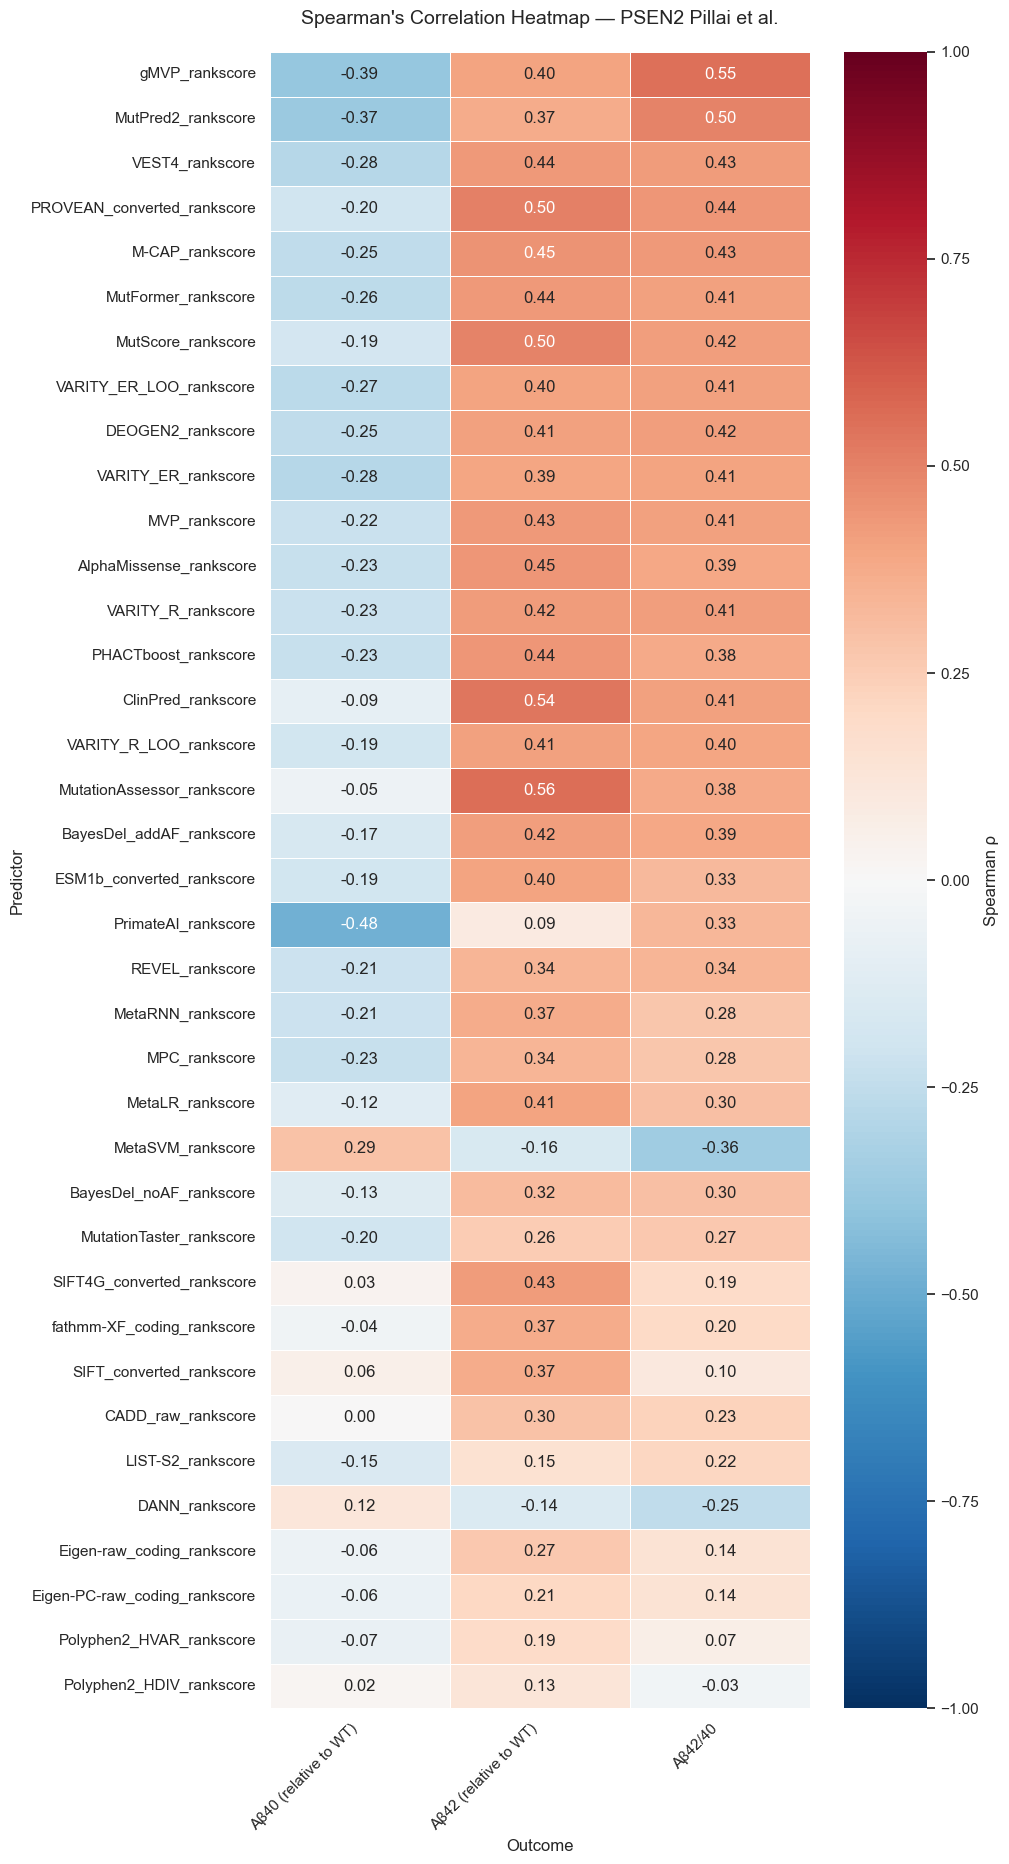

In [58]:
# --- 🔟 Plot Heatmap ---
sns.set(style="white", font_scale=1.0)
fig, ax = plt.subplots(figsize=(10, 0.4 * len(predictors) + 4))

sns.heatmap(
    rho_matrix,
    cmap="RdBu_r",
    vmin=-1, vmax=1,
    annot=True, fmt=".2f",
    linewidths=0.5,
    cbar_kws={"label": "Spearman ρ"},
    ax=ax
)

ax.set_title(HEATMAP_TITLE, fontsize=14, pad=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

In [59]:
# --- 1️⃣1️⃣ Save Heatmap ---
output_fig = f"../figures/{OUTPUT_PREFIX}_heatmap.png"
fig.savefig(output_fig, dpi=600, bbox_inches="tight", facecolor="white")
print(f"Saved heatmap → {output_fig}")

Saved heatmap → ../figures/PSEN2_Pillai_heatmap.png


In [60]:
# --- 1️⃣1️⃣ Significance Summary (p < 0.05) ---

ALPHA = 0.05

# Filter significant correlations
sig_df = corr_df[corr_df["p_value"] < ALPHA].copy()

# Add direction of effect (sign of rho)
sig_df["Direction"] = np.where(sig_df["rho"] > 0, "Positive", "Negative")

# Select and rename columns for clarity
summary_table = sig_df[
    ["Predictor", "Outcome", "p_value", "Direction"]
].sort_values(["Predictor", "Outcome"])

# Count predictors with at least one significant outcome
n_sig_predictors = summary_table["Predictor"].nunique()
n_total_predictors = corr_df["Predictor"].nunique()

# Display results
print(f"Significant predictors (p < {ALPHA}): "
      f"{n_sig_predictors} / {n_total_predictors}")

summary_table


Significant predictors (p < 0.05): 26 / 37


,Predictor,Outcome,p_value,Direction
37,SIFT_converted_rankscore,Aβ42 (relative to WT),0.033860,Positive
38,SIFT4G_converted_rankscore,Aβ42 (relative to WT),0.013230,Positive
42,MutationAssessor_rankscore,Aβ42 (relative to WT),0.000779,Positive
79,MutationAssessor_rankscore,Aβ42/40,0.030184,Positive
43,PROVEAN_converted_rankscore,Aβ42 (relative to WT),0.002759,Positive
80,PROVEAN_converted_rankscore,Aβ42/40,0.010662,Positive
44,VEST4_rankscore,Aβ42 (relative to WT),0.011048,Positive
81,VEST4_rankscore,Aβ42/40,0.012898,Positive
82,MetaSVM_rankscore,Aβ42/40,0.041376,Negative
46,MetaLR_rankscore,Aβ42 (relative to WT),0.019272,Positive


In [61]:
# --- 1️⃣2️⃣ Significant Negative Associations ---

ALPHA = 0.05

# Filter: significant p-value AND negative rho
sig_neg_df = corr_df[
    (corr_df["p_value"] < ALPHA) &
    (corr_df["rho"] < 0)
].copy()

# Add direction label (explicit)
sig_neg_df["Direction"] = "Negative"

# Select and sort relevant columns
negative_summary_table = sig_neg_df[
    ["Predictor", "Outcome", "p_value", "rho", "Direction"]
].sort_values(["Predictor", "Outcome"])

# Counts
n_neg_pairs = len(negative_summary_table)
n_neg_predictors = negative_summary_table["Predictor"].nunique()

negative_summary_table


,Predictor,Outcome,p_value,rho,Direction
82,MetaSVM_rankscore,Aβ42/40,0.041376,-0.357041,Negative
13,MutPred2_rankscore,Aβ40 (relative to WT),0.035122,-0.367981,Negative
15,gMVP_rankscore,Aβ40 (relative to WT),0.025655,-0.388035,Negative
17,PrimateAI_rankscore,Aβ40 (relative to WT),0.004510,-0.481952,Negative


In [62]:
# Total number of correlation tests performed
n_total_tests = len(corr_df)

print(f"Total correlation tests performed: {n_total_tests}")
print(f"Significant negative correlations (p < {ALPHA}): {n_neg_pairs}")
print(
    f"Proportion of tests with significant negative correlation: "
    f"{n_neg_pairs} / {n_total_tests} "
    f"({n_neg_pairs / n_total_tests:.1%})"
)


Total correlation tests performed: 111
Significant negative correlations (p < 0.05): 4
Proportion of tests with significant negative correlation: 4 / 111 (3.6%)


In [63]:
# --- 1️⃣3️⃣ Significant Positive Associations ---

ALPHA = 0.05

# Filter: significant p-value AND positive rho
sig_pos_df = corr_df[
    (corr_df["p_value"] < ALPHA) &
    (corr_df["rho"] > 0)
].copy()

# Add direction label
sig_pos_df["Direction"] = "Positive"

# Select and sort relevant columns
positive_summary_table = sig_pos_df[
    ["Predictor", "Outcome", "p_value", "rho", "Direction"]
].sort_values(["Predictor", "Outcome"])

# Counts
n_pos_pairs = len(positive_summary_table)
n_pos_predictors = positive_summary_table["Predictor"].nunique()
n_total_tests = len(corr_df)

positive_summary_table


,Predictor,Outcome,p_value,rho,Direction
37,SIFT_converted_rankscore,Aβ42 (relative to WT),0.033860,0.370379,Positive
38,SIFT4G_converted_rankscore,Aβ42 (relative to WT),0.013230,0.426875,Positive
42,MutationAssessor_rankscore,Aβ42 (relative to WT),0.000779,0.556076,Positive
79,MutationAssessor_rankscore,Aβ42/40,0.030184,0.377800,Positive
43,PROVEAN_converted_rankscore,Aβ42 (relative to WT),0.002759,0.504429,Positive
80,PROVEAN_converted_rankscore,Aβ42/40,0.010662,0.438649,Positive
44,VEST4_rankscore,Aβ42 (relative to WT),0.011048,0.436737,Positive
81,VEST4_rankscore,Aβ42/40,0.012898,0.428285,Positive
46,MetaLR_rankscore,Aβ42 (relative to WT),0.019272,0.405349,Positive
47,MetaRNN_rankscore,Aβ42 (relative to WT),0.032677,0.372692,Positive


In [64]:
# Display results
print(f"Total correlation tests performed: {n_total_tests}")
print(f"Significant positive correlations (p < {ALPHA}): {n_pos_pairs}")
print(f"Predictors with ≥1 significant positive outcome: {n_pos_predictors}")
print(
    f"Proportion of tests with significant positive correlation: "
    f"{n_pos_pairs} / {n_total_tests} "
    f"({n_pos_pairs / n_total_tests:.1%})"
)

Total correlation tests performed: 111
Significant positive correlations (p < 0.05): 42
Predictors with ≥1 significant positive outcome: 24
Proportion of tests with significant positive correlation: 42 / 111 (37.8%)
